In [33]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("/Users/hrishikeshhpillai/Documents/hrishi/gridai/forecasting/datasets/SolarPrediction2.csv", parse_dates=['datetime'], index_col = ['datetime'])
df

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
datetime,,,,,,
2016-09-29 23:55:26,1.21,48,30.46,59,177.39,5.62
2016-09-29 23:50:23,1.21,48,30.46,58,176.78,3.37
2016-09-29 23:45:26,1.23,48,30.46,57,158.75,3.37
2016-09-29 23:40:21,1.21,48,30.46,60,137.71,3.37
2016-09-29 23:35:24,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...
2016-12-01 00:20:04,1.22,44,30.43,102,145.42,6.75
2016-12-01 00:15:01,1.17,44,30.42,102,117.78,6.75
2016-12-01 00:10:01,1.20,44,30.42,102,145.19,9.00


<Axes: xlabel='datetime'>

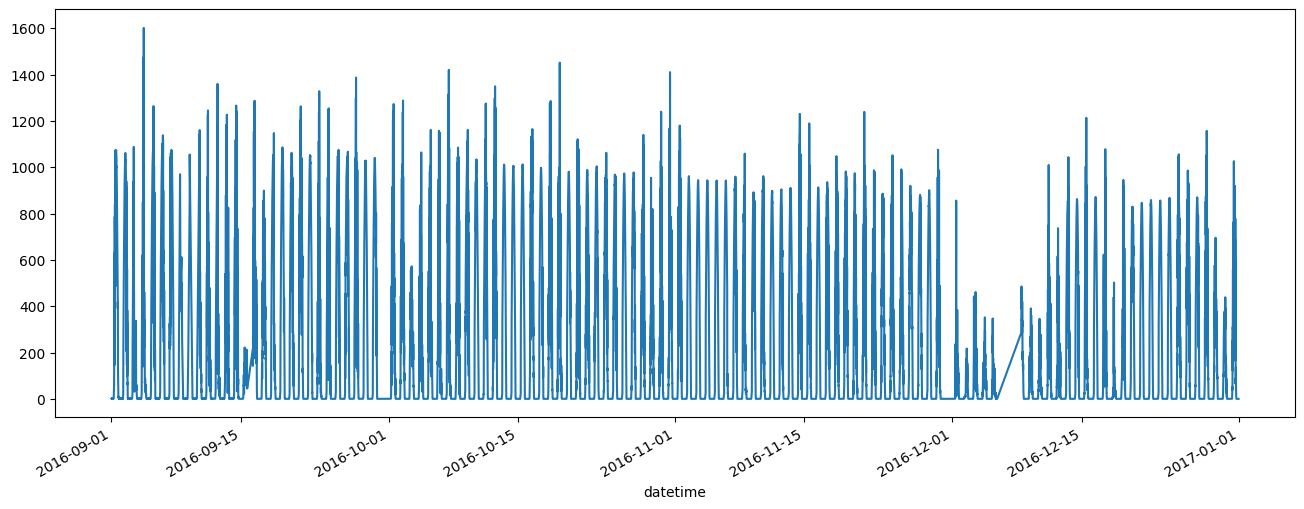

In [35]:
df['Radiation'].plot(figsize=(16,6))

In [36]:
df['Radiation'].max()

1601.26

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X = df[["Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed"]]
X = X.sort_values(by="datetime", ascending=True)
X

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
datetime,,,,,
2016-09-01 00:00:08,51,30.43,103,77.27,11.25
2016-09-01 00:05:10,51,30.43,103,153.44,9.00
2016-09-01 00:20:06,51,30.43,103,142.04,7.87
2016-09-01 00:25:05,51,30.43,103,144.12,18.00
2016-09-01 00:30:09,51,30.43,103,67.42,11.25
...,...,...,...,...,...
2016-12-31 23:35:02,41,30.34,83,238.94,6.75
2016-12-31 23:40:01,41,30.34,82,236.79,5.62
2016-12-31 23:45:04,42,30.34,81,218.28,7.87


In [40]:
y = df[["Radiation"]]
y = y.sort_values(by="datetime", ascending=True)
y

,Radiation
datetime,
2016-09-01 00:00:08,2.58
2016-09-01 00:05:10,2.83
2016-09-01 00:20:06,2.16
2016-09-01 00:25:05,2.21
2016-09-01 00:30:09,2.25
...,...
2016-12-31 23:35:02,1.22
2016-12-31 23:40:01,1.21
2016-12-31 23:45:04,1.21


In [41]:
X.shape[1]

5

In [42]:
X_train = []
y_train = []

HORIZON = 1   # Number of days we want to look into the future based on the past days.
WINDOW = 59  # Number of past days we want to use to predict the future.

for i in range(len(X)):
    X_train.append(X[i :i+WINDOW])



    # [   [[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]],
    #     [[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]],
    #  ]

InvalidIndexError: (slice(0, 59, None), slice(0, 5, None))

In [17]:
import numpy as np
X_train = np.array(X_train)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (32686,) + inhomogeneous part.